# Homework 2 - The Best Books of All Time

### Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats
from scipy.stats import kstest

In [2]:

import functions

# RQ1: Exploratory Data Analysis (EDA)


## Authors:

### 1) Import

---



In [3]:
# Read the data from the JSON file (lighter_authors.json) and create a DataFrame with "lines" mode
df_authors = pd.read_json('lighter_authors.json', lines=True)

### 2) Data Exploration

---



> #### View the Data: First of all we display the first few rows of the dataset using dataframe.head() to get a quick overview.









In [ ]:
df_authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179




> #### Check Data Types: Using shape and dtypes attributes we can provide informations about the structure and data types of the DataFrame



In [ ]:
print(df_authors.shape)
print(df_authors.dtypes)

(351767, 12)
ratings_count           int64
average_rating        float64
text_reviews_count      int64
work_ids               object
book_ids               object
works_count             int64
id                      int64
name                   object
gender                 object
image_url              object
about                  object
fans_count              int64
dtype: object


### 3) Data Summary

---









> #### With dataframe.describe() we can generate summary statistics (mean, median, standard deviation, etc.) for numerical columns.



In [ ]:
df_authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


## Books



> ### 1) Import

---





### In this case, considering the substantial size of lighter_books.json, it's not practical to load it directly into a Pandas DataFrame due to memory constraints. Instead, we've implemented a chunk-wise analysis approach, allowing us to process the dataset in more manageable parts. This approach enables us to work efficiently with large data without exhausting system memory resources.

In [ ]:
chunk_size = 10000



> ### 2) Data Exploration

---





#### View the Data:

In [ ]:
for chunk in pd.read_json('/content/drive/MyDrive/lighter_books.json', lines=True, chunksize=chunk_size):
    pd.set_option('display.max_columns', None)
    print(chunk.head())
    break

   id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   

                                             authors   author_name  author_id  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
2                                               None  J.K. Rowling    1077326   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   

   work_id        isbn         isbn13 asin language  average_rating  \
0  2809203  0439358078  9780439358071           eng            4.50   
1  4640799


> #### Check Data Types:



In [ ]:
functions.describe_dataframe_from_large_jsonl('/content/drive/MyDrive/lighter_books.json', chunksize=200000)

Total DataFrame Shape: (7027431, 26)

Column Data Types:
id: int64
title: object
authors: object
author_name: object
author_id: int64
work_id: int64
isbn: object
isbn13: object
asin: object
language: object
average_rating: float64
rating_dist: object
ratings_count: int64
text_reviews_count: int64
publication_date: object
original_publication_date: object
format: object
edition_information: object
image_url: object
publisher: object
num_pages: object
series_id: object
series_name: object
series_position: object
shelves: object
description: object


### 3) Data Summary

---



In [ ]:
books_description=pd.DataFrame()
for chunk in pd.read_json('/content/drive/MyDrive/lighter_books.json', lines=True, chunksize=10000):
    chunk_description=chunk.describe()
    books_description=pd.concat([books_description, chunk_description])
final_description = books_description.describe()
print(final_description)

                 id     author_id       work_id  average_rating  \
count  5.624000e+03  5.624000e+03  5.624000e+03     5624.000000   
mean   9.953850e+06  3.729290e+06  1.922276e+07     1252.096045   
std    8.759659e+06  6.700446e+06  2.792541e+07     3305.321919   
min    2.000000e+00  4.000000e+00  6.200000e+01        0.000000   
25%    2.786025e+04  9.999000e+03  3.627644e+04        1.647087   
50%    9.439664e+06  7.404532e+05  8.853076e+06        3.690000   
75%    1.808625e+07  3.195924e+06  2.127865e+07        4.422500   
max    2.552102e+07  2.124802e+07  8.972161e+07     9999.000000   

       ratings_count  text_reviews_count  
count   5.624000e+03         5624.000000  
mean    6.787911e+05        17233.633517  
std     1.821208e+06        42209.195171  
min     0.000000e+00            0.000000  
25%     1.100000e+01            1.000000  
50%     3.461743e+03          195.000000  
75%     4.378927e+04         7792.183940  
max     7.400639e+06       174524.000000  


# RQ2: Let’s finally dig into this vast dataset, retrieving some vital information:

## 1) Plot the number of books for each author in descending order.

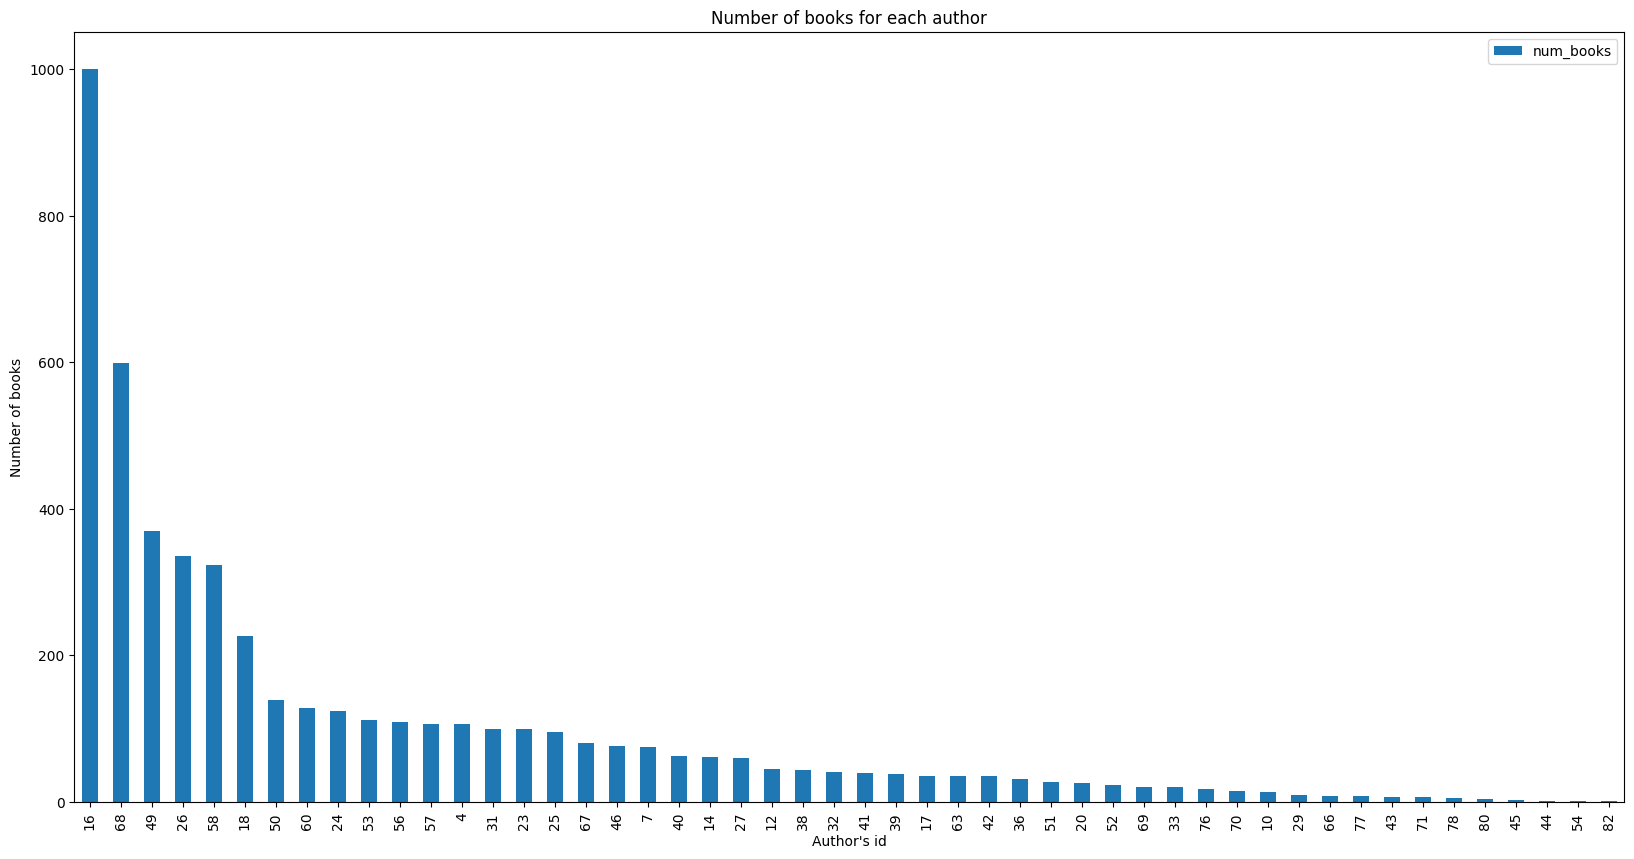

In [ ]:
functions.plot_number_of_books(df_authors)

#### Please note that, as indicated in the code comments, the function currently processes only the first 50 rows of the DataFrame for a cleaner and more concise graph. Additionally, we chose to use the author's ID rather than the author's name because, as demonstrated in rq1, the ID is unique. In contrast, it's possible for multiple authors to share the same name, as will be illustrated later in the analysis

#### 2) Which book has the highest number of reviews?

#### In this first version, different editions of the same book are considered as distinct books.

In [ ]:
functions.highest_number_of_rewiews('/content/drive/MyDrive/lighter_books.json')

The max number of text reviews is: 174524
The book with 174524 rewiews is: 'The Hunger Games (Hunger Games, #1)'


#### In this alternative version, all editions of the same book are treated as a single book.

In [ ]:
functions.highest_number_of_rewiews_bis('/content/drive/MyDrive/lighter_books.json')

The max number of text reviews is: 4768500
The book with 4768500 reviews is: 'pride and prejudice'


### 3) Which are the top ten and ten worst books concerning the average score?

### 4) Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

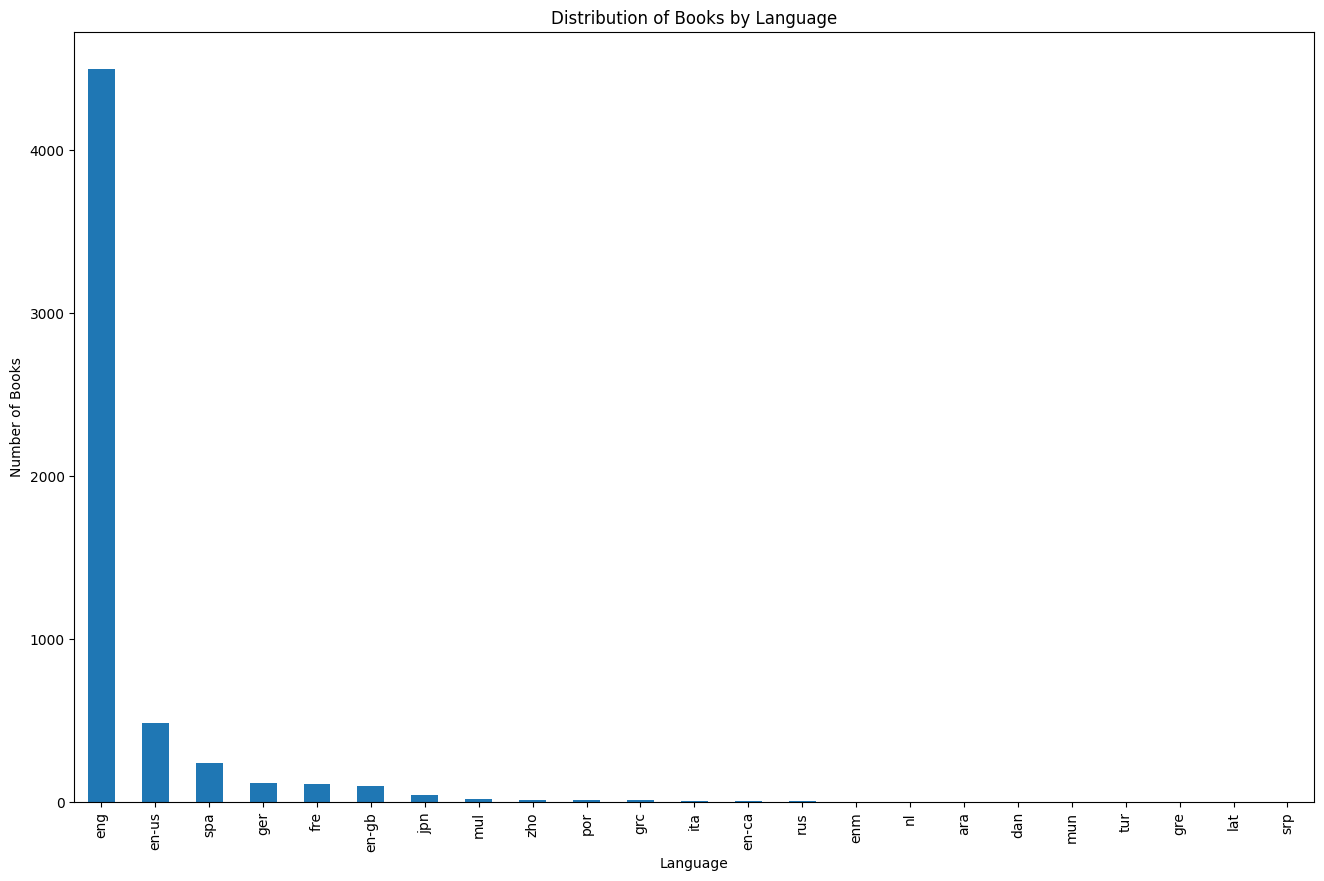

In [ ]:
functions.distribution_of_languages('/content/drive/MyDrive/lighter_books.json')

#### For clarity of the chart, this analysis was performed considering only the first chunk with chunk_size=10000 (see function code for more details).

### 5) How many books have more than 250 pages?

In [ ]:
functions.n_books_with_more_than_250_pages('/content/drive/MyDrive/lighter_books.json')

1810335


### 6) Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

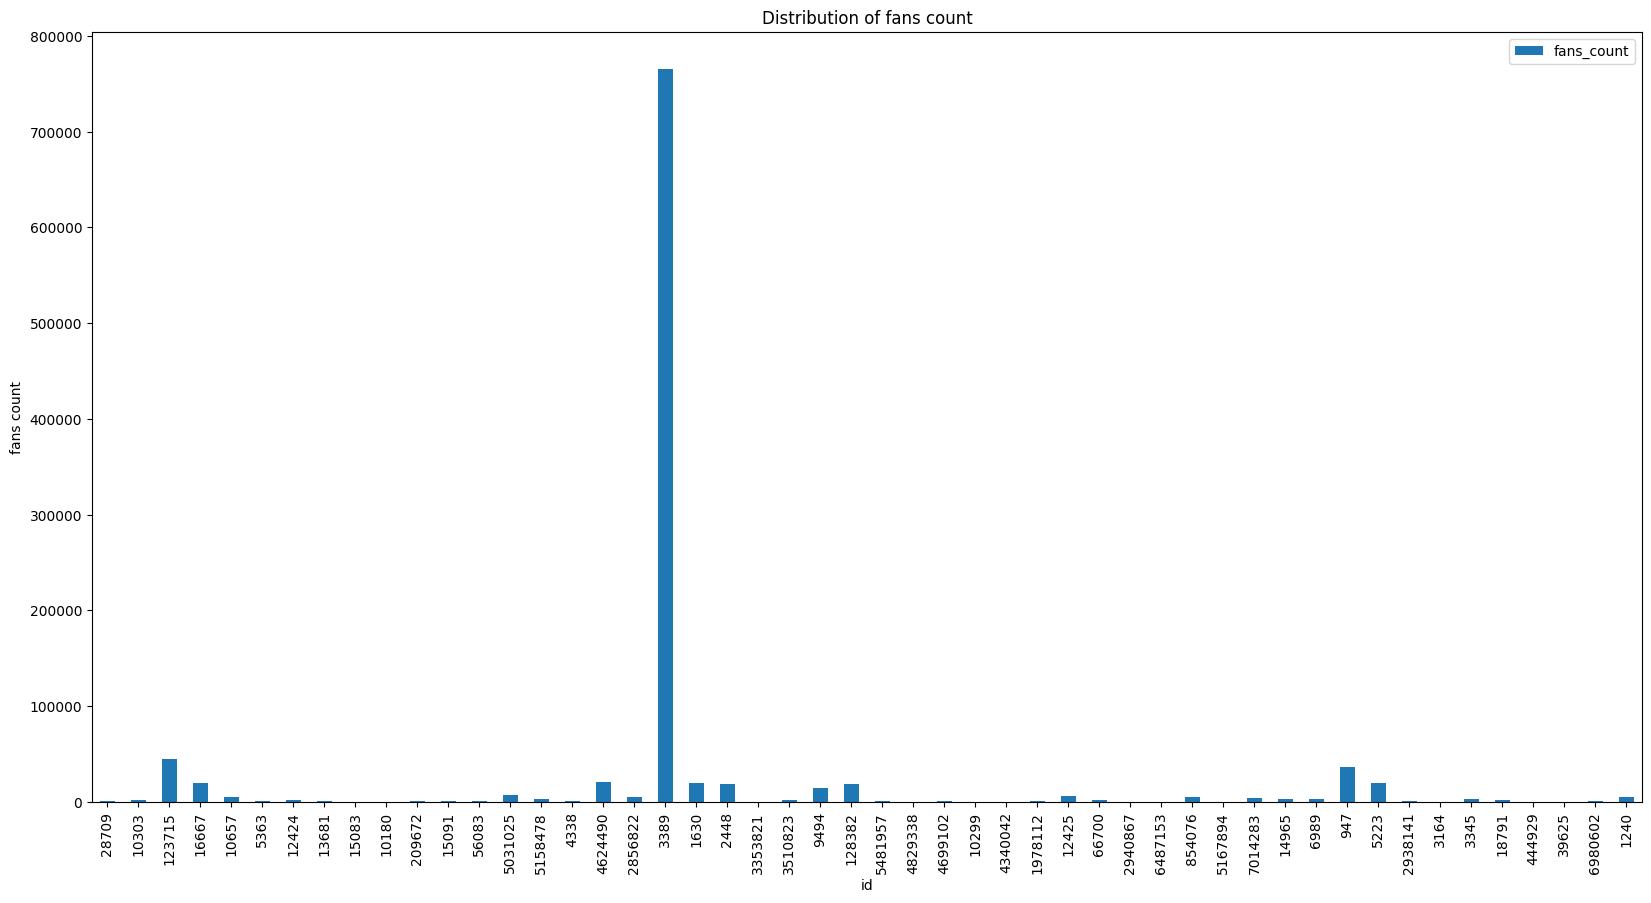

In [ ]:
functions.distribution_of_fans_count(df_authors)

# RQ3:  Let’s have a historical look at the dataset!

### Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.

### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

#### Solution: To speed up the execution time, considering that we are asked for the first ten years registered and the last ten years, after calculating the first and the last, we save the years of interest in a list. Subsequently, we create a new dataframe containing only those rows from the original dataframe whose year is in the list. This way, there will be no need to work in chunks later on.

#### The following function stores the first (min_year) and last (max_year) registered years in the dataset. Note: since we have observed that the dataset contains years beyond 2023, the last valid year considered is 2023 (See the function code for more details)

In [ ]:
min_year, max_year = functions.first_and_last_year_registered('/content/drive/MyDrive/lighter_books.json')
print("First year registered:", min_year)
print("Last year registered", max_year)

First year registered: 1678
Last year registered 2023


In [ ]:
years_of_interest=[]
for year in range(min_year, min_year + 10):
  years_of_interest.append(year)
for year in range(max_year-9, max_year + 1):
  years_of_interest.append(year)
print(years_of_interest)

[1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
selected_chunks = []
for chunk in pd.read_json('/content/drive/MyDrive/lighter_books.json', lines=True, chunksize=1000):
    chunk['original_publication_date'] = pd.to_datetime(chunk['original_publication_date'], errors='coerce')
    chunk = chunk.dropna(subset=['original_publication_date'])
    year_chunk = chunk[chunk['original_publication_date'].dt.year.isin(years_of_interest)]
    if not year_chunk.empty:
        selected_chunks.append(year_chunk)
selected_df = pd.concat(selected_chunks, ignore_index=True)
head_df=selected_df.head()
print("Head of the new DataFrame:")
print(head_df.to_string(index=False))

Head of the new DataFrame:
  id                                                    title                                                                                                authors            author_name  author_id  work_id       isbn        isbn13 asin language  average_rating                       rating_dist  ratings_count  text_reviews_count publication_date original_publication_date    format edition_information                                                                                          image_url          publisher num_pages series_id series_name series_position                                                                                                                                                                                                                                                                                                                                                                                                                   

#### The following is the requested function.

In [ ]:
def my_function(df, year):
    num_books = 0
    total_pages = 0
    prolific_month = None
    max_value = 0
    title_of_max_value = None
    df['original_publication_date'] = pd.to_datetime(df['original_publication_date'], errors='coerce')
    df = df.dropna(subset=['original_publication_date'])
    selected_year= df[df['original_publication_date'].dt.year == year]

    if not selected_year.empty:
        num_books = len(selected_year)
        selected_year= selected_year[selected_year['num_pages'] != '']
        selected_year['num_pages'] = selected_year['num_pages'].astype(int)
        total_pages = selected_year['num_pages'].sum()

        selected_prolific_month = selected_year['original_publication_date'].dt.month.value_counts().idxmax()
        prolific_month = selected_prolific_month

        max_value_chunk = selected_year['num_pages'].max()
        title_of_max_value = selected_year[selected_year['num_pages'] == max_value_chunk]['title'].values[0]

    result = {
        'Num_Books': num_books,
        'Total_Pages': total_pages,
        'Prolific_Month': prolific_month,
        'Title_of_Max_Value': title_of_max_value
    }
    return result

#### Now we can use our function to build the dataframe.

In [ ]:
results_df = pd.DataFrame(columns=['Year', 'Num_Books', 'Total_Pages', 'Prolific_Month', 'Title_of_Max_Value'])
for year in years_of_interest:
    result=my_function(selected_df , year)
    result['Year'] = year
    results_df = pd.concat([results_df, pd.DataFrame([result])], ignore_index=True)
print(results_df)

    Year Num_Books Total_Pages Prolific_Month  \
0   1678       946      120058              2   
1   1679        31        2332              1   
2   1680        84       13352              1   
3   1681       120       12774              1   
4   1682       395       41882              1   
5   1683        47        5402              1   
6   1684        99        9193              1   
7   1685        79        9262              1   
8   1686       100       12250              1   
9   1687       165       34329              1   
10  2014    358376    44591442              1   
11  2015    119988    14386882              1   
12  2016      3447      740098              1   
13  2017      1038      179499              1   
14  2018       413       82198              1   
15  2019       319       50895              1   
16  2020       278       36721              5   
17  2021        52       10677              3   
18  2022        28        2587             10   
19  2023        13  

### Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [ ]:
def chat_gbt_function(selected_df, year):
    # Initialize variables to store the results
    num_books_published = 0
    total_pages_written = 0
    month_count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
    longest_book = {'title': None, 'pages': 0}

    # Iterate through the rows of the DataFrame
    for index, row in selected_df.iterrows():
        publication_year = row['original_publication_date'].year

        num_pages_str = str(row['num_pages'])  # Convert the value to a string
        if num_pages_str.strip():  # Check if the value is not empty or whitespace
            try:
                num_pages = int(num_pages_str)
            except ValueError:
                num_pages = 0  # Handle the case where the value is not a valid integer
        else:
            num_pages = 0  # Handle the case where the value is empty

        if publication_year == year:
            num_books_published += 1
            total_pages_written += num_pages

            publication_month = row['original_publication_date'].month

            if publication_month in month_count:
                month_count[publication_month] += 1

            if num_pages > longest_book['pages']:
                longest_book['title'] = row['title']
                longest_book['pages'] = num_pages

    most_prolific_month = max(month_count, key=month_count.get)

    result= {
        'num_books_published': num_books_published,
        'total_pages_written': total_pages_written,
        'most_prolific_month': most_prolific_month,
        'longest_book': longest_book
    }

    return result



In [ ]:
results_df = pd.DataFrame(columns=['Year', 'num_books_published', 'total_pages_written', 'most_prolific_month', 'longest_book'])
for year in years_of_interest:
    result = chat_gbt_function(selected_df, year)
    result['Year'] = year
    results_df = pd.concat([results_df, pd.DataFrame([result])], ignore_index=True)
print(results_df)

    Year num_books_published total_pages_written most_prolific_month  \
0   1678                 946              120058                   2   
1   1679                  31                2332                   1   
2   1680                  84               13352                   1   
3   1681                 120               12774                   1   
4   1682                 395               41882                   1   
5   1683                  47                5402                   1   
6   1684                  99                9193                   1   
7   1685                  79                9262                   1   
8   1686                 100               12250                   1   
9   1687                 165               34329                   1   
10  2014              358376            44591442                   1   
11  2015              119988            14386882                   1   
12  2016                3447              740098                

#### ChatGPT initially provided me a non-working function. However, as I provided more context and corrected the errors over time, I ended up with the same results of my own function.

# [RQ4] Quirks questions about consistency

##  1) You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
functions.no_eponymous(df_authors)

It's false. There are authors who have precisely the same name


## 2) Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [ ]:
id_list=[4,10, 1077326]
functions.author_and_books('/content/drive/MyDrive/lighter_books.json',id_list)

Author id: 4, Books: ["the hitchhiker's guide to the galaxy (hitchhiker's guide to the galaxy, #1)", "the ultimate hitchhiker's guide: five complete novels and one story (hitchhiker's guide to the galaxy, #1-5)", "the ultimate hitchhiker's guide to the galaxy (hitchhiker's guide to the galaxy, #1-5)", "the hitchhiker's guide to the galaxy: quandary phase (hitchhiker's guide: radio play, #4)", "the ultimate hitchhiker's guide (hitchhiker's guide to the galaxy, #1-5)", "the hitchhiker's guide to the galaxy: quintessential phase (hitchhiker's guide: radio play, #5)", 'the long dark tea-time of the soul (dirk gently, #2)', "dirk gently's holistic detective agency (dirk gently, #1)", 'the salmon of doubt (dirk gently, #3)', "mostly harmless (hitchhiker's guide to the galaxy, #5)", "life, the universe and everything (hitchhiker's guide, #3)", 'the salmon of doubt', 'the salmon of doubt: hitchhiking the galaxy one last time', 'the salmon of doubt: hitchhiking the galaxy one last time (dirk ge

## 3) What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?


In [ ]:
my_df=functions.top_20_authors(df_authors, 'id', 'average_rating')
print(my_df)

          id  average_rating
0   16777164             5.0
1   20890814             5.0
2   17556718             5.0
3   21222299             5.0
4    4444870             5.0
5    4444483             5.0
6    4443702             5.0
7   13537047             5.0
8   13538021             5.0
9    4447710             5.0
10  13538328             5.0
11  17015962             5.0
12   4442948             5.0
13   4442479             5.0
14   4435832             5.0
15   4434796             5.0
16   4446700             5.0
17   4451542             5.0
18  13530727             5.0
19  13532658             5.0


In [ ]:
functions.longest_book_title('/content/drive/MyDrive/lighter_books.json', my_df)

Longest book title among the books of the top 20 authors regarding their average rating: Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland
Len of the longest title: 98
Is it the longest book title overall?
No it's not. For example the book: The Christmas Books of Charles Dickens: A Christmas Carol,  Christmas Festivities, The Story of the Goblins Who Stole a Sexton, A Christmas Tree, The Seven Poor Travellers, The Haunted Man + A Christmas episode from Master Humphrey's Clock is longer


## 4) What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [ ]:
functions.shortest_book_title('/content/drive/MyDrive/lighter_books.json')

The shortest title is: 


In [ ]:
functions.shortest_book_title_bis('/content/drive/MyDrive/lighter_books.json')

The shortest title is: a


#### After noticing that there are some rows with empty titles, we also observed that there are some book titles that do not exist in reality.

# RQ5 We can consider the authors with the most fans to be influential. Let’s have a deeper look.


### 1) Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

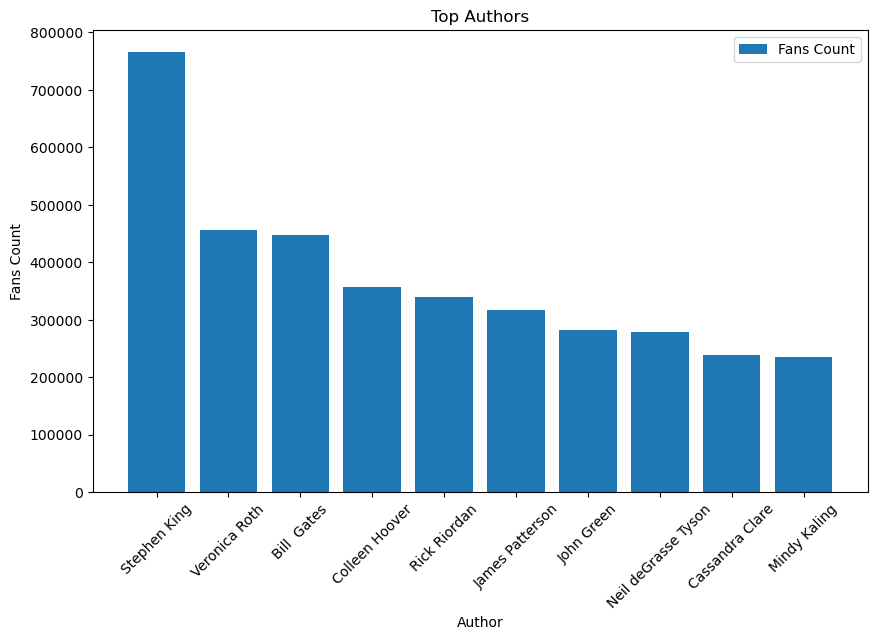

In [5]:
#Extract the 10 authors with highest fans_count
top_authors = df_authors.nlargest(10, 'fans_count')

#Plot them
functions.plot_df(top_authors)



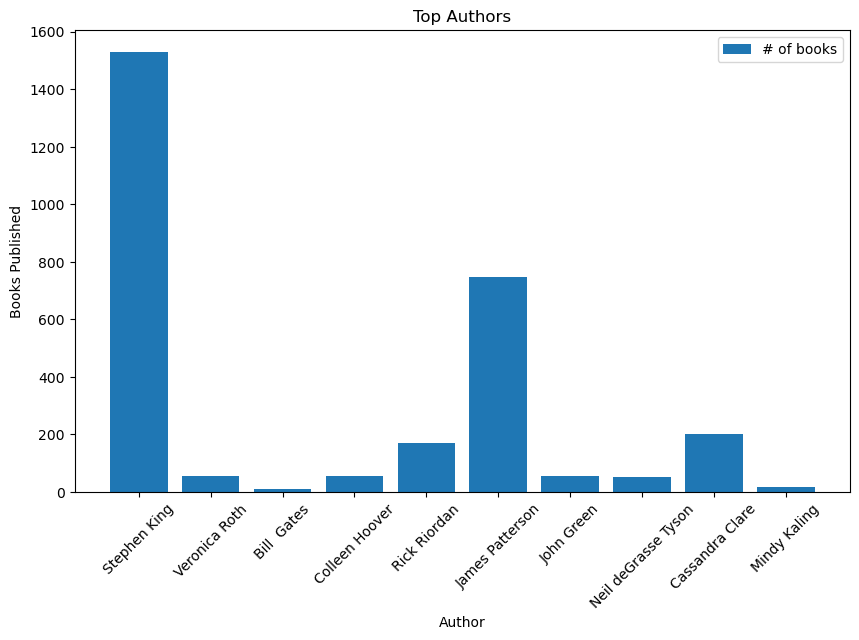

In [5]:
# Plot the number of books written by these top 10 authors
functions.plot_best_books(top_authors)


>#### The most influential author is Stephen King, with *fans_count* $= 766035$.

>#### We extract the books written by these 10 most influent authors and name them "top_books".

In [6]:
top_books = functions.get_top_books(top_authors)


### 2) Have they published any series of books? If any, extract the longest series name among these authors.


In [7]:
functions.longest_series_name(top_books)

Longest Series Name: Percy Jackson and the Olympians: The Graphic Novels


### 3) How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

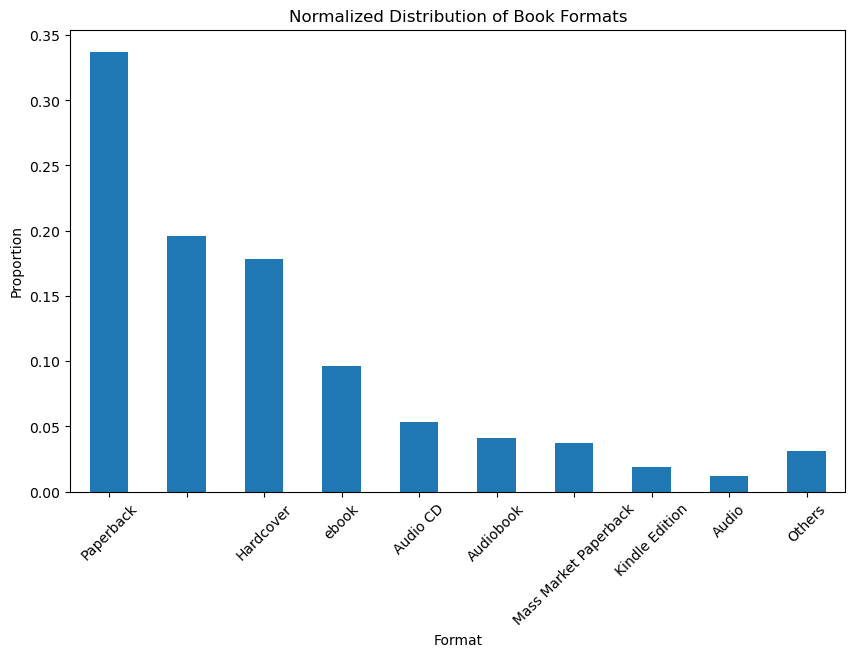

In [8]:

# Get the distro of the different formats
normalized_format_counts = functions.format_counts(top_books)

# Create a bar chart
functions.chart_plot(normalized_format_counts)

>#### As we can see, the most common book format is still paperback, the second most common is unknown format and the third hardcover.

### 4) Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”


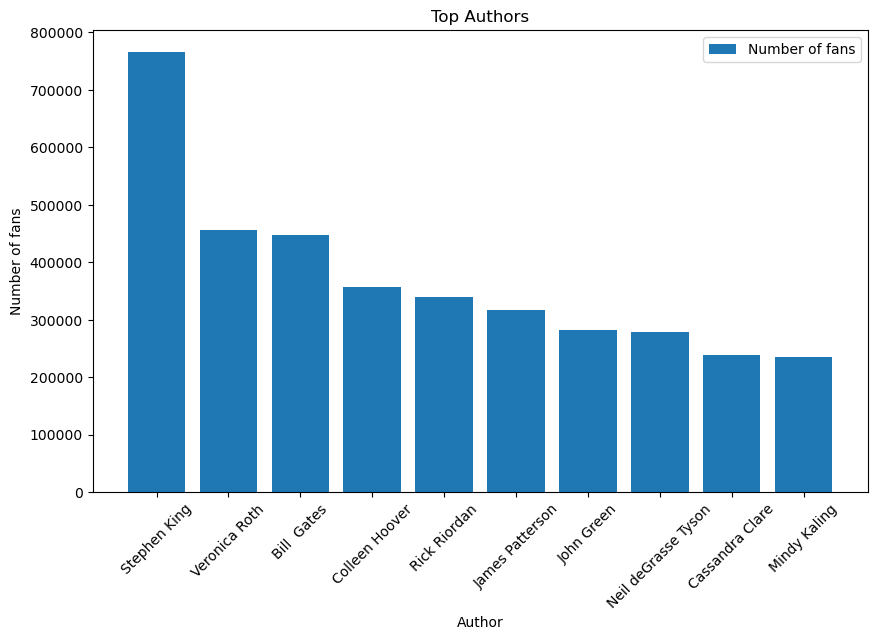

In [9]:
functions.plot_info(top_authors,'fans_count','Number of fans')

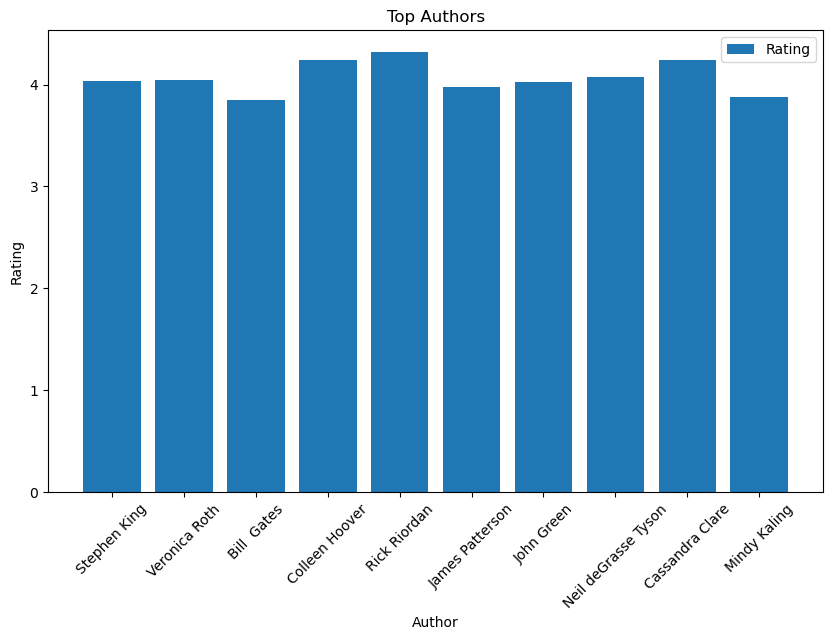

In [10]:
functions.plot_info(top_authors,'average_rating','Rating')

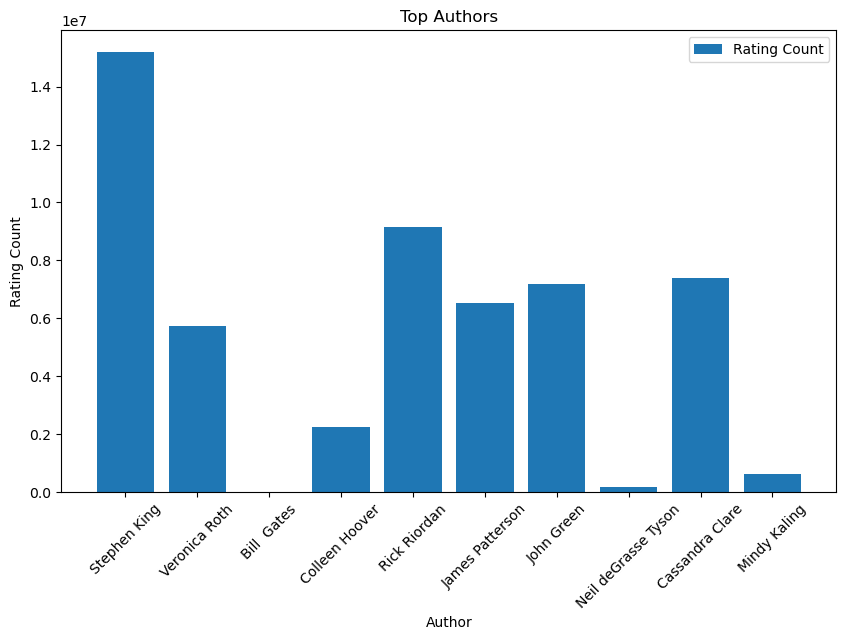

In [11]:
functions.plot_info(top_authors,'ratings_count','Rating Count')

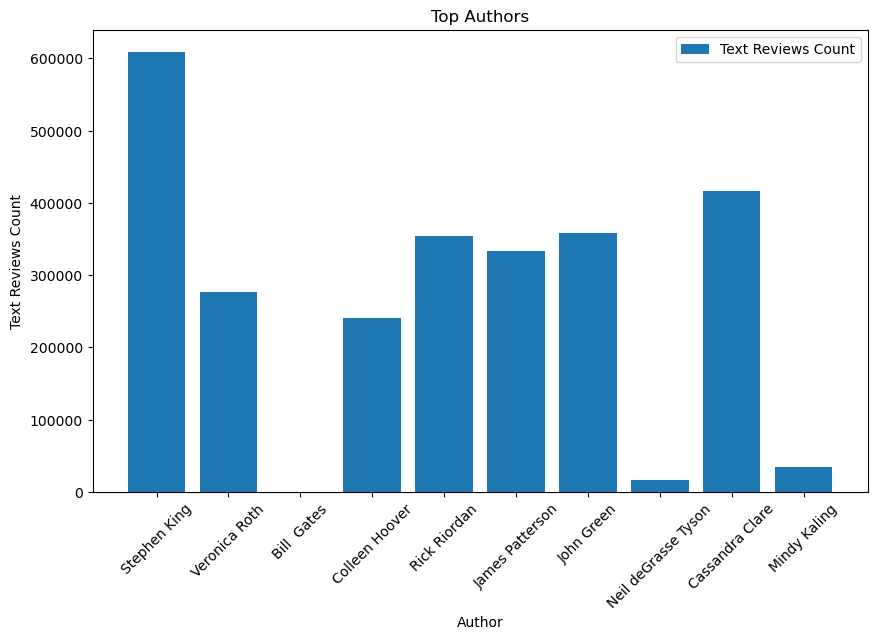

In [12]:
functions.plot_info(top_authors,'text_reviews_count','Text Reviews Count')

>#### Based on the previous charts, we can observe that the average rating among the top 10 most influential authors is relatively consistent across the board, despite significant variations in the number of ratings for each of these authors.

>#### Now we divide the authors by gender and look for structural bias.

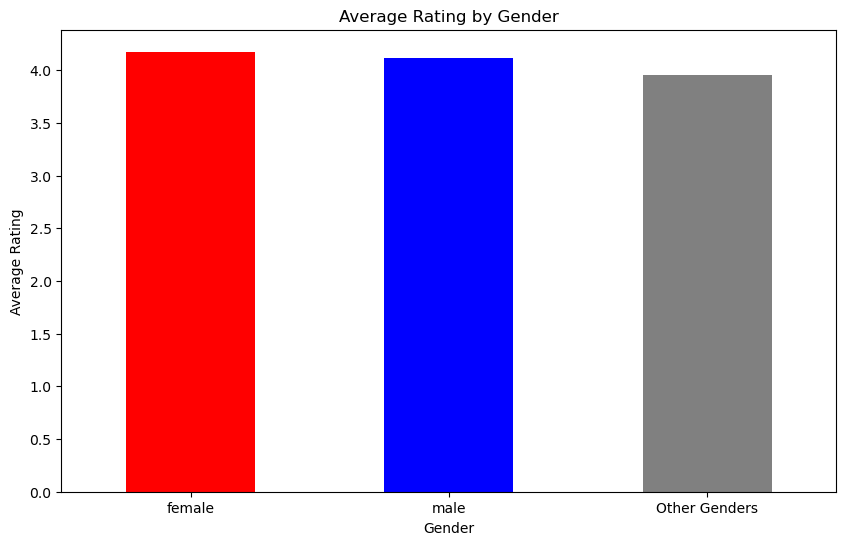

In [13]:

# Group authors by gender and calculate the average rating for each group
grouped = top_authors.groupby('gender')['average_rating'].mean().copy()

# Replace empty values with 'Other Genders'
grouped['Other Genders'] = grouped.pop('')

#Plot the average rating by genders
functions.bias_plot(grouped,'Average Rating','Average Rating by Gender')

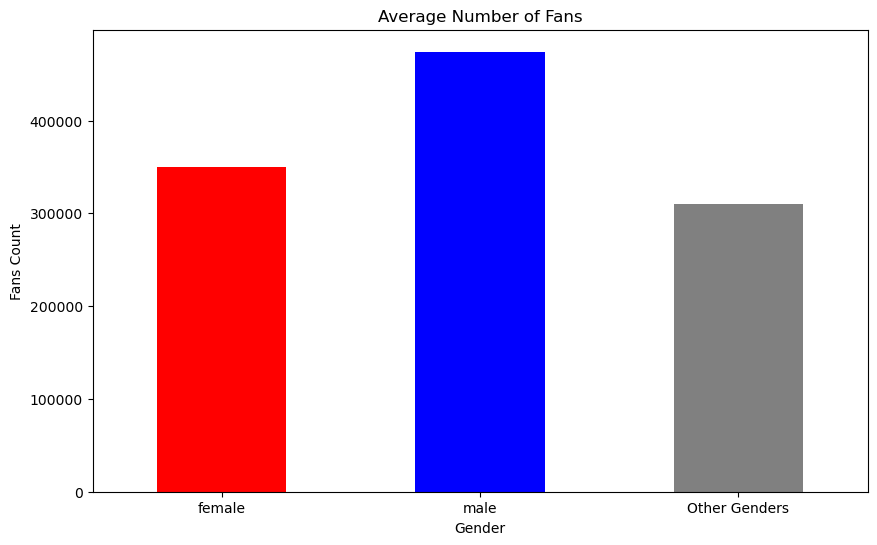

In [14]:

# Group authors by gender and calculate the average rating for each group
grouped = top_authors.groupby('gender')['fans_count'].mean().copy()

# Replace empty values with 'Other Genders'
grouped['Other Genders'] = grouped.pop('')

#Plot the average number of fans by gender
functions.bias_plot(grouped,'Fans Count','Average Number of Fans')

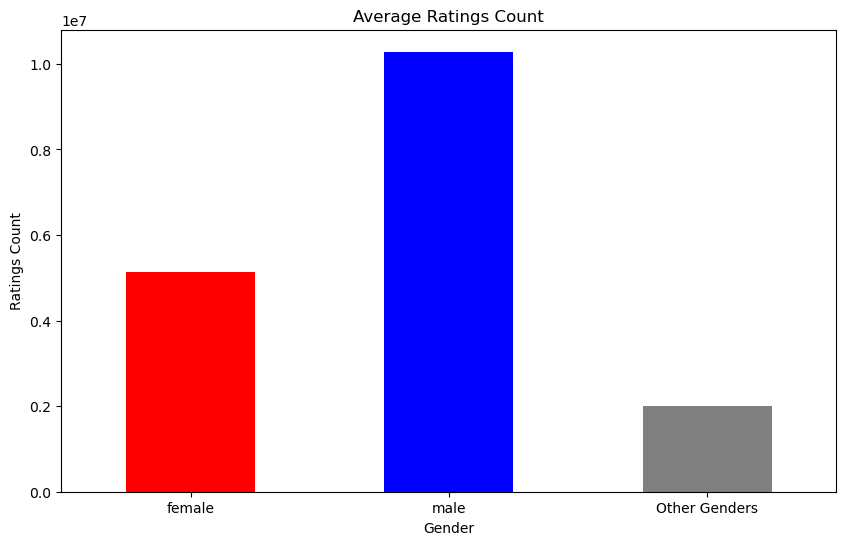

In [15]:
# Group authors by gender and calculate the average rating for each group
grouped = top_authors.groupby('gender')['ratings_count'].mean()

# Replace empty values with 'Other Genders'
grouped['Other Genders'] = grouped.pop('')

#Plot the average number of fans by gender
functions.bias_plot(grouped,'Ratings Count','Average Ratings Count')


>#### We can infer that there exists a minor structural bias with respect to gender. Even though the average rating remains consistent across genders, the distribution of fans and ratings differs among genders. It appears that readers exhibit a greater interest in male authors.

# RQ6 For this question, consider the top 10 authors concerning the number of fans again.

### For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

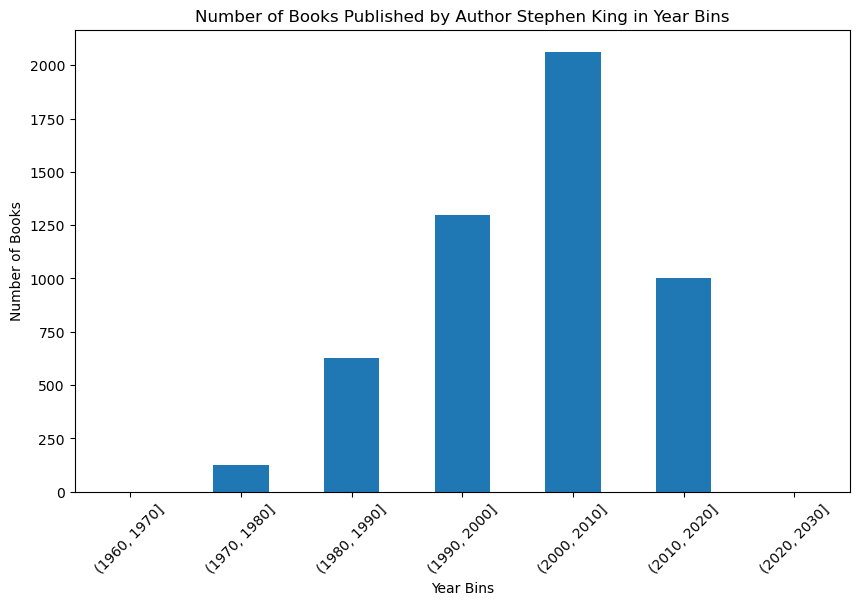

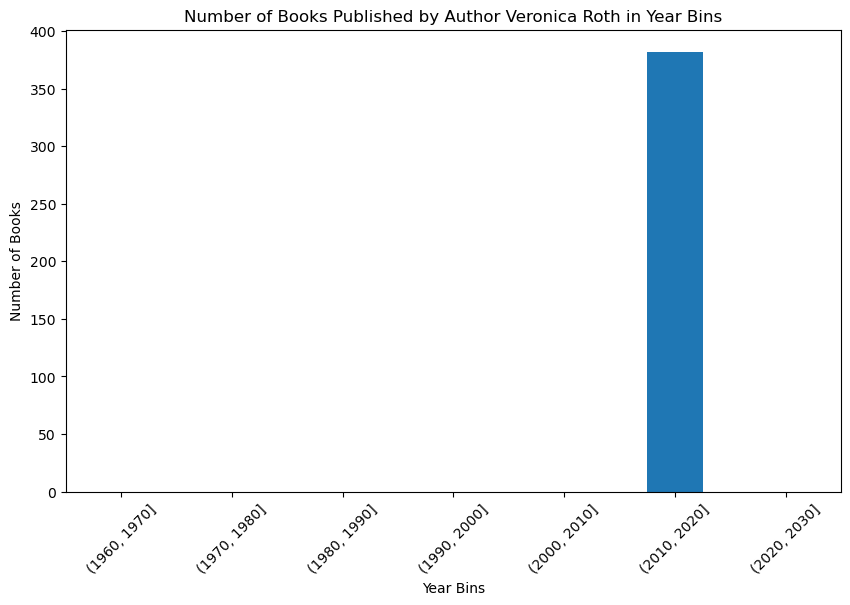

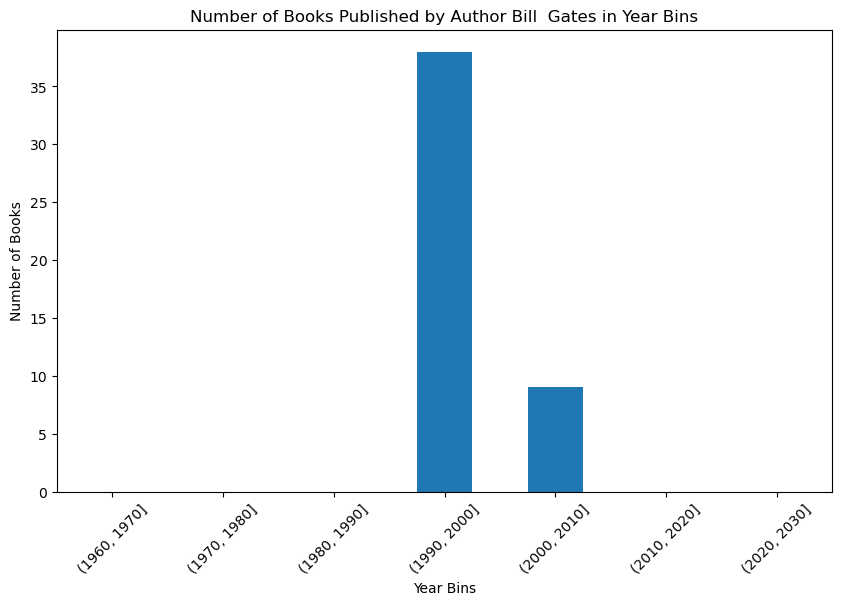

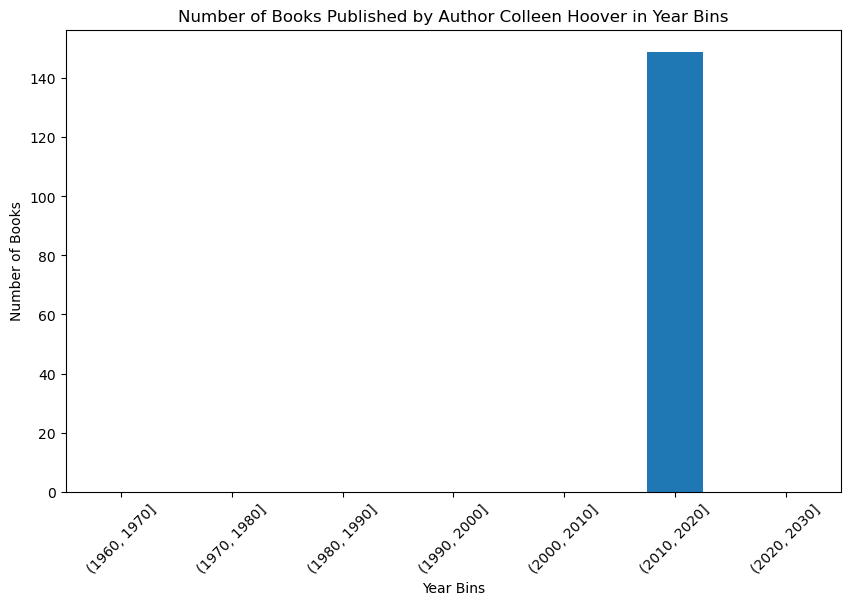

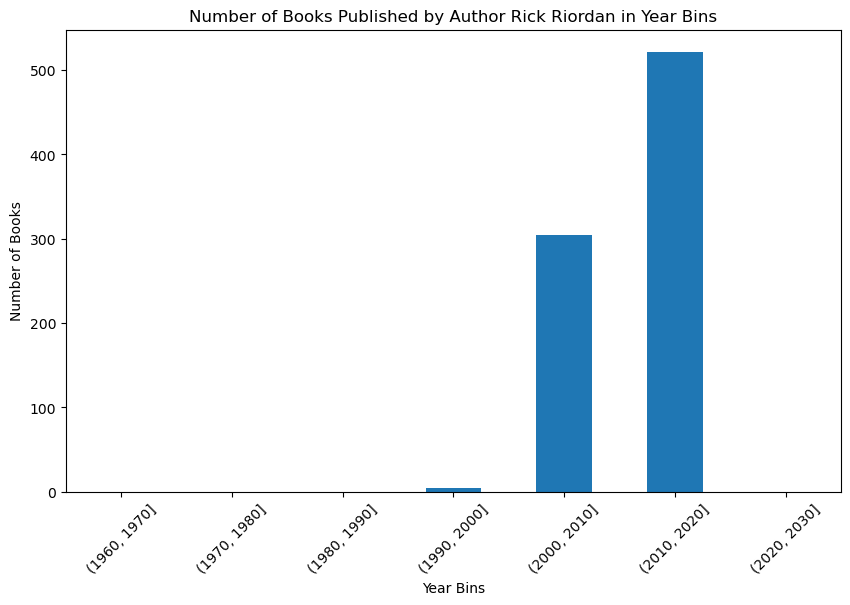

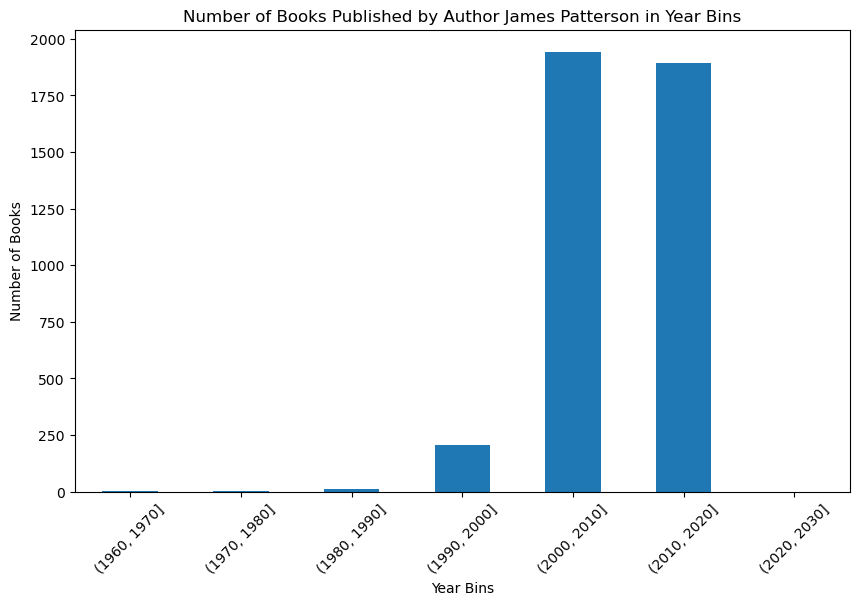

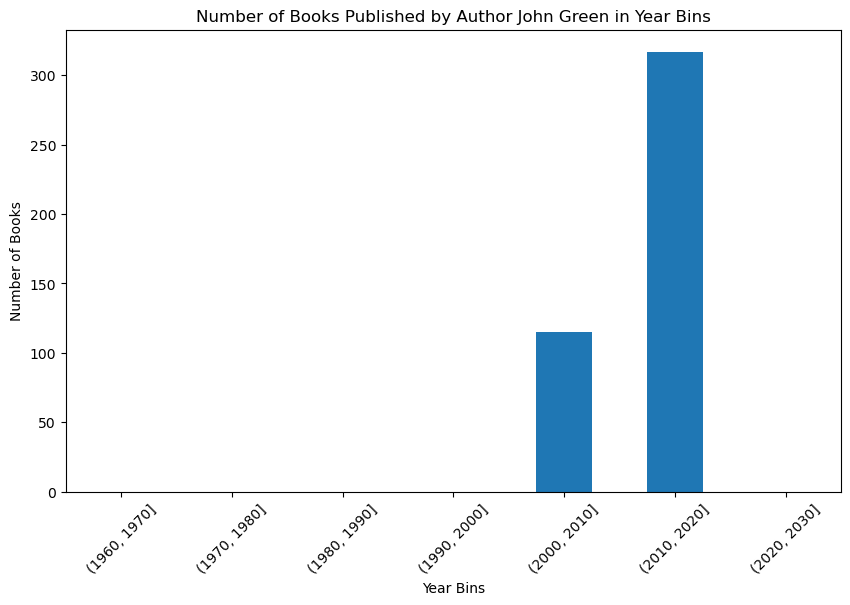

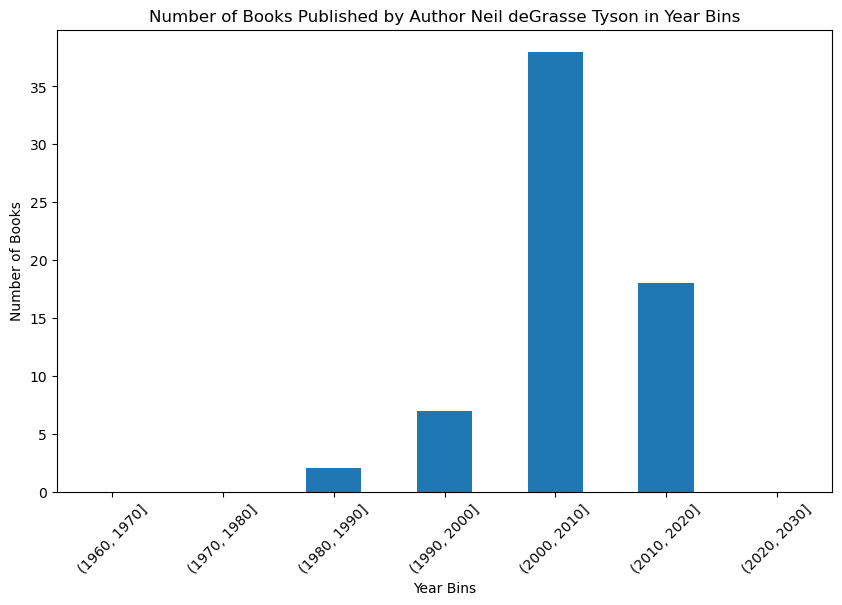

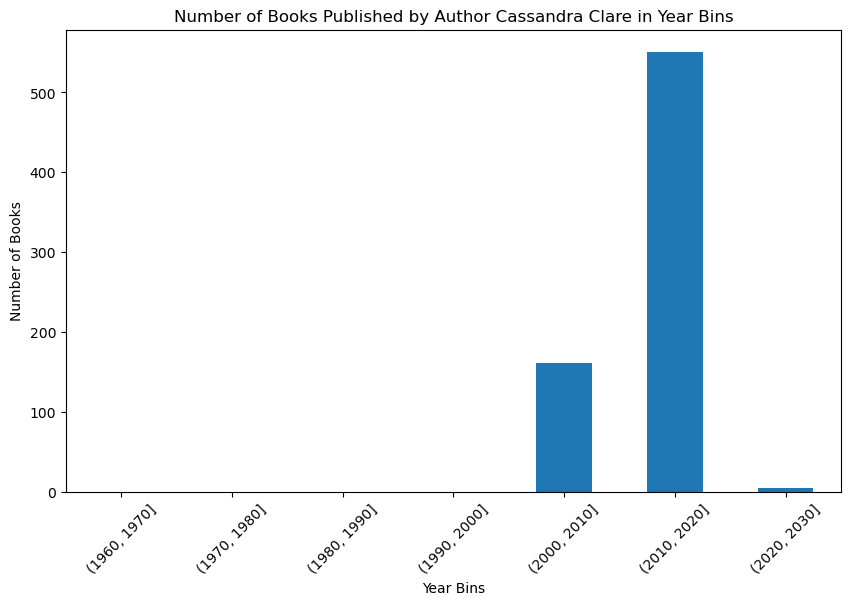

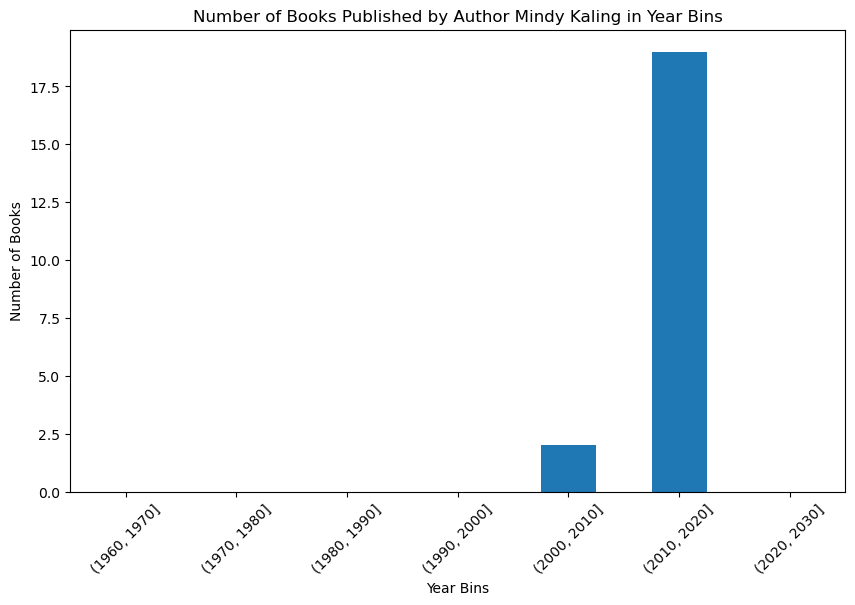

In [7]:
functions.up_to_published_books(top_authors, top_books)

>#### We can observe that in general the years from 2000 to 2020 are the most productive ones for all of these authors.

# [RQ7] Estimating probabilities

**1) Estimate the probability that a book has over 30% of the ratings above 4.**

Given a discrete rating distribution ranging from 1 to 5, we can identify the likelihood of a book receiving over 30% of the ratings by focusing on the rating equal to 5.

In [35]:
# Define a function named 'extract_rating_5' that takes a string 'rating_dist' as an argument
def extract_rating_5(rating_dist):
    # Split the 'rating_dist' string at each "|" character and store the resulting list in the variable 'ratings'
    ratings = rating_dist.split("|")
    for rating in ratings:
        # Check if the current item starts with "5:"
        if rating.startswith("5:"):
            return int(rating.split(":")[1])
    # If none of the items in the 'ratings' list start with "5:", it will return None
    return None

In [36]:
# Initialize the counter for the total number of books
tot_books=0
# Initialize the counter for the number of books with a rating percentage over 30%
count=0

for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/lighter_books.json', lines=True, chunksize=10000):

  # Extract the 'rating_dist' and 'ratings_count' columns from the chunk
  data=chunk[["rating_dist","ratings_count"]].dropna() # remove any rows with missing values

  # Apply the 'extract_rating_5' function
  data["rating_dist"] = data["rating_dist"].apply(extract_rating_5)

  # Calculate the percentage of 5-star ratings by dividing the number of 5-star ratings by the total number of ratings
  # If the total number of ratings is 0, set the percentage of 5-star ratings to 0
  data['perc_5'] = data.apply(lambda row: row["rating_dist"] / row["ratings_count"] if row["ratings_count"] != 0 else 0, axis = 1)

  # Update the counter for the total number of books
  tot_books += data.shape[0]

  # Update the counter for the number of books with a rating percentage over 30%
  count += data[data.perc_5 >= 0.3].shape[0]

In [37]:
# Calculate the probability that a book has over 30% of the ratings above 4
prob = round(count / tot_books * 100, 2) # the result is rounded to two decimal places
print(f"The probability that a book has over 30% of the ratings above 4 is :",prob)

The probability that a book has over 30% of the ratings above 4 is : 45.02



The calculated probability that a book has over 30% of the rating above 4 is **45.02%**.

**2) Estimate the probability that an author publishes a new book within two years from its last work.**

To estimate the probability that an author publishes a new book within two years from its last work, we need to count the number of books that have a publication date difference within two years and divide this by the total number of date differences among consecutive publications. This approach can provide a statistical measure of how frequently an author typically publishes a new book within a two-year period.

In [11]:
# Calculate the difference in 'original_publication_date'
def intervals(author):
    return author['original_publication_date'].diff()

In [21]:
data = pd.DataFrame()

for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/lighter_books.json', lines=True, chunksize=10000):
  data = chunk[['id','author_id','original_publication_date']].copy()
  data = data.dropna(subset=['id','author_id','original_publication_date'])

dlt = data[pd.to_datetime(data['original_publication_date'], errors='coerce').isna()] #replacing any errors with Na
dlt_id = dlt['id'].tolist() # create a list for id values

#Remove any rows where the 'id' is in dlt_id
data = data[~data['id'].isin(dlt_id)]

In [23]:
# Set by default 1st January all the records that have only the year
data['original_publication_date'] = pd.to_datetime(data['original_publication_date'])

# Sort the dataframe by author_id and original_publication_date
data = data.sort_values(by = ['author_id','original_publication_date'], ascending = True)

# Calculate the difference in 'original_publication_date' within each author group
data['date_interval'] = data.groupby('author_id').apply(intervals).reset_index(level = 0, drop = True)

# Remove the authors that have published only one book
data = data[data['date_interval'] > pd.Timedelta(days=0)]
# Include only the rows with books published within two years
b_2years = data[data['date_interval'] <= pd.Timedelta(days=730)]

# Calculate the number of books published within two years
num_books_2years = len(p_2years)

# Calculate the probability that an author publishes a new book within two years from its last work
p = (b_2years.shape[0] / data.shape[0]) * 100

print(f"The number of books published within two years: {num_books_2years}")
print("The probability that an author publishes a new book within two years from its last work: ", round(p, 2),"%")

The number of books published within two years: 232
The probability that an author publishes a new book within two years from its last work:  62.91 %


The probability that an author publishes a new book within two years from its last work is **32.91 %**

**3) In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.**

Considering two events, **X** and **Y**, defined as follows:

X= "**Being Included in The Worst Books of All Time list**"

Y= "**Having more than 700 pages**"


The probability of event X given event Y is given by the following formula:

\begin{equation}
P(X|Y) = \frac{P(X \cap Y)}{P(Y)}
\end{equation}

In [4]:
worst_books=pd.Series(dtype = object) #creating an empty series
for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/list.json', lines=True, chunksize=200):
  worst_books=chunk.loc[0]
  break

In [5]:
# Creating a list of id books that belong to the Worst Books of All Time list
book_ids = [int(book['book_id']) for book in worst_books['books'] if 'book_id' in book]

In [6]:
#Creating an empty dataframe with two columns ('id', 'num_pages')
df_worst_books = pd.DataFrame(columns = ['id','num_pages'])

all_pages=list()
for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/lighter_books.json', lines=True, chunksize=2000):
  filter = chunk[chunk['id'].astype(int).isin(book_ids)]
  page_counts = filter[['id','num_pages']]
  df_worst_books = pd.concat([df_worst_books, page_counts])

  #During the chunk operation, we are saving the page numbers of all the books for subsequent operations
  all_pages += chunk[chunk['num_pages'].astype(str).str.strip() != '']['num_pages'].tolist()


In [7]:
df_worst_books = df_worst_books[df_worst_books['num_pages'].astype(str).str.strip() != '']

count_x_y = df_worst_books[df_worst_books['num_pages'].astype(int) > 700].shape[0]
print(f'Number of books in the worst books list with more than 700 pages: {count_x_y}')

prob_x_y = count_x_y/  len(all_pages) * 100
print(f'Probability of a book being in the worst books list and having more than 700 pages: {round(prob_x_y, 3)}%')

Number of books in the worst books list with more than 700 pages: 220
Probability of a book being in the worst books list and having more than 700 pages: 0.006%


In [8]:
count_y = sum(1 for page in all_pages if page > 700)
print(f'Number of pages greater than 700: {count_y}')
prob_y = count_y / len(all_pages) * 100
print(f'Percentage of pages greater than 700:', round(prob_y,2),'%')

Number of pages greater than 700: 111120
Percentage of pages greater than 700: 2.81 %


In [9]:
final_prob=round(prob_x_y / prob_y, 3)
print(f'Probability of a book being in the worst books list, knowing it has more than 700 pages: {final_prob}%')

Probability of a book being in the worst books list, knowing it has more than 700 pages: 0.002%


The probability of a book being included in the worst books list, knowing it has more than 700 pages is **0.002%**

**4) Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.**

Two events X and Y are independent if the joint probability of the two events is equal to the product of their individual probabilities.
\begin{equation}
P(X \cap Y) = P(X) \cdot P(Y)
\end{equation}

In [10]:
#Percentage of being included in The Worst Books of All Time list
prob_x = len(book_ids) / len(all_pages) * 100
print(f'Percentage of being included in The Worst Books of All Time list => P(X)= ',round(prob_x, 2),'%')
print(f'Percentage of pages greater than 700=> P(Y)=', round(prob_y,2),'%')

if(prob_x_y==prob_x*prob_y):
  print("\nX and Y are independent")
else :
  print("\nX and Y are not independent")

print('\nP(X)P(Y) = ',round(prob_x*prob_y, 3),'%')
print('\nP(X)∩P(Y):', round(prob_x_y, 3),'%')


Percentage of being included in The Worst Books of All Time list => P(X)=  0.19 %
Percentage of pages greater than 700=> P(Y)= 2.81 %

X and Y are not independent

P(X)P(Y) =  0.525 %

P(X)∩P(Y): 0.006 %


It can be seen from the output that X and Y are not indipendent because
$
P(X \cap Y) \neq P(X) \cdot P(Y)$


# [RQ8] Charts, statistical tests, and analysis methods

**1) Can you demonstrate that readers usually rate the longest books as the worst?**


In [19]:
for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/lighter_books.json', lines=True, chunksize=200000):

  # Select the 'num_pages' and 'average_rating' columns and drop rows with missing values
  selected_columns=chunk[["num_pages","average_rating"]].dropna()

  #Replace empty strings in the 'num_pages' column with NaN
  selected_columns['num_pages'].replace('', np.nan, inplace=True)
  # Drop rows with NaN values in the 'num_pages' column
  selected_columns['num_pages'].dropna()

  '''
  Classifying books into three distinct groups based on page numbers:
  'short' (0 to 500 pages), 'medium' (501 to 1000 pages), and 'long' (over 1000 pages).
  This categorization helps to explore how the length of books relates to their average ratings,
  making it more comprehensible and interpretable.

  '''

  # Define the bins and labels for categorizing book length
  bins = [0, 500, 1000, selected_columns['num_pages'].max()]
  labels = ['short', 'medium', 'long']

  # Create a new column 'length_category' based on the 'num_pages' column values
  selected_columns['length_category'] = pd.cut(selected_columns['num_pages'], bins=bins, labels=labels)

  # Group the data by 'length_category' and calculate the mean of 'average_rating'
  avg_ratings = selected_columns.groupby('length_category')['average_rating'].mean()

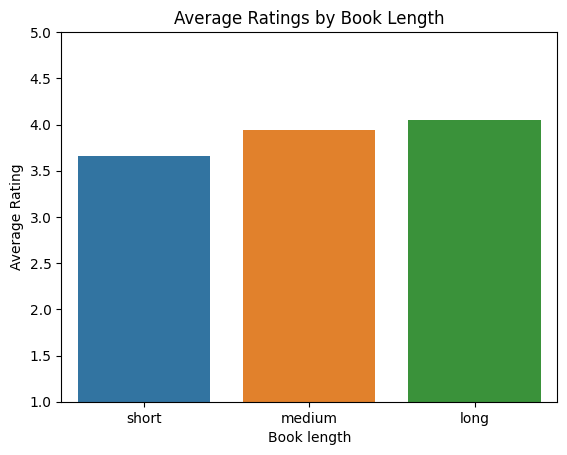

In [22]:
# Create a bar plot using Seaborn
sns.barplot(x=avg_ratings.index, y=avg_ratings.values)

# Set the y-axis label and chart title
plt.ylabel('Average Rating')
plt.xlabel('Book length')
plt.title('Average Ratings by Book Length')

# Set the y-axis limits for the chart
plt.ylim(1,5)

plt.show()

In [23]:
# Calculate the correlation between "num_pages" and "average_rating
correlation = selected_columns['num_pages'].corr(selected_columns['average_rating'])
# Print the correlation value
print("Correlation between num pages and average rating:", correlation)

Correlation between num pages and average rating: 0.11814687022853215


 The correlation between num pages and average rating indicates a positive but relatively weak correlation between the two variables. This relationship is not very strong, meaning that book length alone does not substantially impact the average rating of books in the dataset. In other words, different factors might be influencing the ratings more significantly.

**2) Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?**

In [24]:
for chunk in pd.read_json('/content/drive/MyDrive/ADM/Homework_2/lighter_books.json', lines=True, chunksize=200000):

  # Filter the DataFrame to separate English and Non-English books
  languages = chunk[(chunk['language'] != ' ')]
  eng_books = languages[( (languages['language'] == "eng") | (languages['language'] == "en-US") | (languages['language'] == "US") | (languages['language'] == "en-GB") )]
  no_eng_books= languages[( (languages['language'] != "eng") & (languages['language'] != "en-US") & (languages['language'] != "US") & (languages['language'] != "en-GB") )]

In [25]:
filter_no_eng = no_eng_books.loc[(no_eng_books['average_rating'] >= 1) & (no_eng_books['average_rating'] <= 5)]
filter_eng = eng_books.loc[(eng_books['average_rating'] >= 1) & (eng_books['average_rating'] <= 5)]

# Perform a two-sample independent t-test to compare the average ratings of English and Non-English books
t_stat, p_value = stats.ttest_ind(filter_eng['average_rating'], filter_no_eng['average_rating'], equal_var=False)
# We set a significance level (alpha) of 0.05, which is a common choice in hypothesis testing
alpha=0.05
if p_value < alpha:
    print("There is difference between English and non-English books in the average ratings.")
else:
    print("There is no difference between English and non-English books  in the average ratings.")
print(f"P-value: {p_value}")
print(f"t-statistic: {t_stat}")

There is difference between English and non-English books in the average ratings.
P-value: 1.0203367949378383e-35
t-statistic: 12.506939232016975


It can be observed that the p value has a value less than 0.05 performing a two-sample independent t-test. In conclusion, if the p-value is less than 0.05, we reject the null hypothesis.

Text(0, 0.5, 'Density')

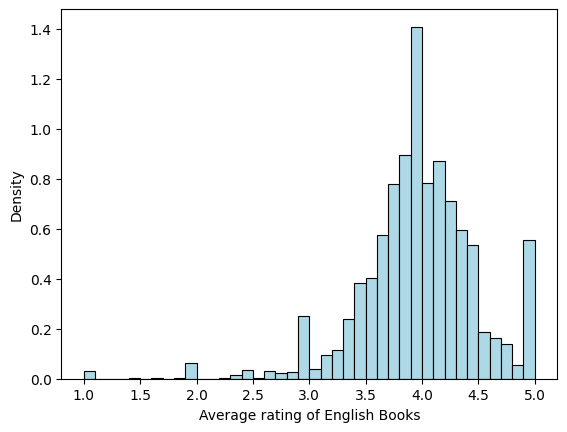

In [26]:
sns.histplot(filter_eng['average_rating'], binwidth=0.1, color='lightblue', alpha=1, stat = 'density')
plt.xlabel('Average rating of English Books')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

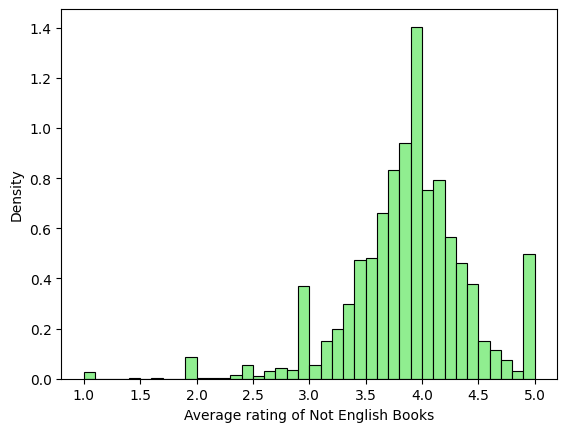

In [27]:
sns.histplot(filter_no_eng['average_rating'], binwidth=0.1, color='lightgreen', alpha=1, stat = 'density')
plt.xlabel('Average rating of Not English Books')
plt.ylabel('Density')

**3) About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.**

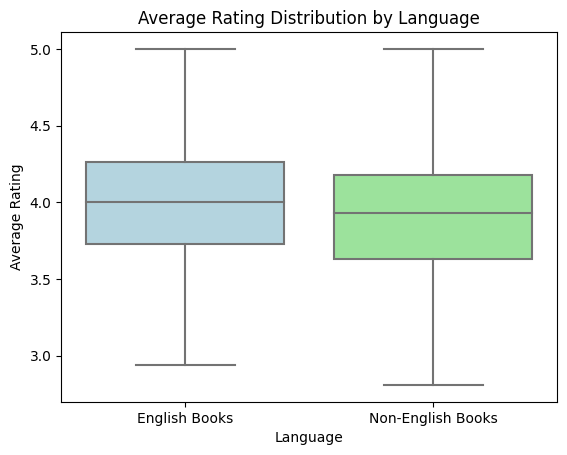

In [28]:
import seaborn as sns
data_to_plot = pd.DataFrame({
    'English Books': filter_eng['average_rating'].dropna(),
    'Non-English Books': filter_no_eng['average_rating'].dropna()
})

# Create a figure and axis for the box plot
fig, ax = plt.subplots()

palette = ['lightblue', 'lightgreen']
# Create the box plot
sns.boxplot(data=data_to_plot, palette=palette, showfliers=False)

# Set labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating Distribution by Language')

# Show the plot
plt.show()

In [29]:
print("Mean rating for books written in English " , round(filter_eng['average_rating'].mean(),2))
print("Mode rating for books written in English ", filter_eng['average_rating'].mode())
print("Median rating for books written in English ",filter_eng['average_rating'].median())
print("First quartile (25th Percentile) for  books written in English ",filter_eng['average_rating'].quantile(.25))
print("Third quartile (75th Percentile) for  books written in English ",filter_eng['average_rating'].quantile(.75))

Mean rating for books written in English  3.98
Mode rating for books written in English  0    4.0
Name: average_rating, dtype: float64
Median rating for books written in English  4.0
First quartile (25th Percentile) for  books written in English  3.73
Third quartile (75th Percentile) for  books written in English  4.26


In [30]:
print("Mean rating for books NOT written in English " , round(filter_no_eng['average_rating'].mean(),2))
print("Mode rating for books NOT  written in English ", filter_no_eng['average_rating'].mode())
print("Median rating for books NOT written in English ",filter_no_eng['average_rating'].median())
print("First quartile (25th Percentile) for books NOT written in English ",filter_no_eng['average_rating'].quantile(.25))
print("Third quartile (75th Percentile) for books NOT written in English ",filter_no_eng['average_rating'].quantile(.75))

Mean rating for books NOT written in English  3.89
Mode rating for books NOT  written in English  0    4.0
Name: average_rating, dtype: float64
Median rating for books NOT written in English  3.93
First quartile (25th Percentile) for books NOT written in English  3.63
Third quartile (75th Percentile) for books NOT written in English  4.18


**4) It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.**

In [31]:
df_authors['fans_count']=pd.to_numeric(df_authors['fans_count'], errors = 'coerce')
df_authors['ratings_count']=pd.to_numeric(df_authors['ratings_count'], errors = 'coerce')
df_authors['text_reviews_count']=pd.to_numeric(df_authors['text_reviews_count'], errors = 'coerce')

In [32]:
x=df_authors['fans_count']
y=df_authors['ratings_count']

Ordinary Least Squares regression (OLS) is a common method for estimating the coefficients in linear regression equations. It describes the relationship between one or more independent quantitative variables and a dependent variable. In our case ratings_count is the dependent variable while fans_count is the independent variable.

In [33]:
import statsmodels.api as sm

X = sm.add_constant(x) #add a constant to the predictor variable
model = sm.OLS(y, X) # create an OLS regression model
result = model.fit() #fit the OLS model to the data

# Print out the statistics
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          ratings_count   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.788e+05
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:15:22   Log-Likelihood:            -4.4685e+06
No. Observations:              351767   AIC:                         8.937e+06
Df Residuals:                  351765   BIC:                         8.937e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2391.5638    134.233     17.816      0.0

Looking at the result that we got, it seems reasonable to assume that authors with more fans should have more reviews.
We notice that the p-value for the 'fans_count' variable is less than 0.05 so we can reject the null hypothesis.

In this case, the coefficient for fans_count is 21.3144, which means that for each additional fan, the number of reviews increases by 21 on average.

However, the R-squared value is relatively low, exactly
33,7%. It indicates that the model does not explain a large proportion of the variation in ratings_count.



In [34]:
'''
Let us proceed with the same methodology, this time focusing on the written reviews (text_reviews_count),
in order to analyze the distinctions in comparison to 'ratings_count', which ranges from 1 to 5. It's possible to determine
if fans prefer to give a quick rating for the author instead of being more proactive in writing reviews.
'''

x=df_authors['fans_count']
z=df_authors['text_reviews_count']

X = sm.add_constant(x) #add a constant to the predictor variable
model = sm.OLS(z, X) # create an OLS regression model
result = model.fit() #fit the OLS model to the data

# Print out the statistics
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     text_reviews_count   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 3.273e+05
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:15:54   Log-Likelihood:            -3.2883e+06
No. Observations:              351767   AIC:                         6.577e+06
Df Residuals:                  351765   BIC:                         6.577e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.6578      4.685     46.670      0.0

If we compare the new values of the linear regression between 'fan_count' and 'text_reviews_count' with the previous values, we observe that the R-squared value has increased by 48%. It indicates that the model explains a larger proportion of the variation in 'text_reviews_count'.

In this case, the coefficient for fans_count is 1.0064, which means that for each additional fan, the number of reviews increases by 1 on average.

In conclusion, we observe that authors with a larger fan base should typically have a higher rating count. However, as the number of fans increases, the quantity of written reviews does not rise significantly. Therefore, we can infer that fans tend to be less active in writing reviews.

**5) Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests**

Hypothesis testing is a crucial element of inferential statistics in data analysis and mining and it relies on statistical tests. Statistical tests are used in hypothesis testing to determine whether a predictor variable has a statistically significant relationship with an outcome variable. Two types of statistical tests are parametric and non-parametric.

**Parametric** and **non-parametric** tests are the two main ways of classifying statistical tests. The complexity of this classification is that there is no precise definition of what constitutes a non-parametric test. The choice between these two tests depends on the nature of the data and the assumptions that can be made about it.



*  The **parametric test** is the most common type of test performed to understand the characteristics of the population from a sample. The most common types of parametric tests are regression tests, comparison tests, and correlation tests. Regression tests look for cause-and-effect relationships. Comparison tests look for differences among group means such as T-test and ANOVA.



* **Non-parametric test** is useful when one or more of the common statistical assumptions are violated because they don't make many assumptions about the data. However, they are less powerful than their parametric counterparts; you need to increase the sample size to gain the result that the parametric counterpart would have provided.

# AWSQ

## RUNNING TIME COMPARISON BETWEEN LOCAL AND AWS EC2 INSTANCE

> ### We are asked to find the most common tags and their occurrences in the list.json file. Then we compare the running time executing the python script both in local and using EC2 istance.

## Launching the EC2 instance


1. We access AWS Console Home and we launch an instance EC2.
2. We give it a name. In our case it's "hw_2".
3. We choose a platform for the EC2 instance and the corresponding Operating System. In our case it's "Ubuntu".
4. We select the Instance Type, that is the CPU. In our case it's t3.large.
5. We generate a new key pair. In this case the key pair's name is "hw_2_key.pem".
6. We press the Edit button.

## Connect to the instance

1. From the Command Line we change directories until the one where our key pair is. Our key's name is hw_2_key.pem.
2. Then we launch the following command: ssh -i "hw_2_key.pem" ubuntu@ec2-52-207-232-120.compute-1.amazonaws.com



## The commands used to upload the files and run the script on the EC2 instance through our local system

1. We create a S3 bucket from AWS console.
2. We choose the following AWS Region: US East (N. Virginia) us-east-1.
3. From the permissions, we make our bucket public.
4. Then we upload both the list.json file and the python script called main.py on the S3 bucket.
5. Now we want to download them in the EC2 instance. We edit the Access control list (ACL) from the Permissions of our files stored in the S3 bucket and let that everyone (public access) can read them.
6. We are ready to download them: we connect our EC2 from the command line and then we launch the following command: wget https://mari2024.s3.amazonaws.com/list.json, where mari2024 is the name of the S3 bucket.
7. In conclusion we launch the python script after we have installed python3 and other useful libraries, such as Pandas, with the command: python3 main.py (main.py is our script name).

### The python script

In [8]:
import pandas as pd
import time

# Start running time
start_time = time.time()

# Analize the file by chunks due to its extension
chunksize = 1000
path = 'list.json'

# Initialize an empty DataFrame to store tag counts
tag_counts_df = pd.DataFrame(columns=['Tag', 'Count'])


for chunk in pd.read_json(path, lines=True,  chunksize=chunksize):

    # Delete every row with NaN values or empty list as tags
    chunk = chunk.dropna(subset=['tags']).reset_index(drop=True)
    chunk = chunk[chunk['tags'].apply(len) > 0].reset_index(drop=True)

    # Flatten the lists of tags from the current chunk into a single list
    all_tags = [tag for tags in chunk['tags'] for tag in tags]

    # Count the occurrences of each tag in the current chunk
    tag_counts = pd.Series(all_tags).value_counts().reset_index()
    tag_counts.columns = ['Tag', 'Count']

    # Update the tag_counts_df with counts from the current chunk
    tag_counts_df = tag_counts_df.merge(tag_counts, on='Tag', how='outer')
    tag_counts_df = tag_counts_df.fillna(0)
    tag_counts_df['Count'] = tag_counts_df['Count_x'] + tag_counts_df['Count_y']
    tag_counts_df = tag_counts_df[['Tag', 'Count']]

# Get the top 5 most common tags across all chunks
top_5_tags = tag_counts_df.nlargest(5, 'Count')
print(top_5_tags)
end_time = time.time()
print(f"Running time = {end_time-start_time} s")

               Tag   Count
6          romance  6001.0
1          fiction  5291.0
5      young-adult  5016.0
2          fantasy  3666.0
7  science-fiction  2779.0
Running time = 60.016193151474 s


![Running Time with AWS EC2 instance](Screenshot_AWSQ.png)

### Most common tags

|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|

### Running time table

|Where|running time|
|---|---|
|local|110.39192 s|
|EC2|68.88852 s|

# Algorithmic Question (AQ)

## 1) Implement a code to answer the problem above.

In [ ]:
shelf=[] #Create an empty shelf (list) to store books
n=int(input()) #number of your boss's instructions
#Loop through each of the boss's instructions
for instruction in range(n):
  instruction=instruction.input().split()
  direction=instruction[0] #Get the direction part of the instruction (L, R, or ?)
  book=instruction[1] #Get the book ID part of the instruction
  if direction=='R': #If the direction is 'R', append the book to the right end of the shelf
    shelf.append(book)
  elif direction=='L': #If the direction is 'L', insert the book at the left end of the shelf (0)
    shelf.insert(0, book)
  else:
    #If the direction is '?', calculate the minimum number of books to pop to have the book as the leftmost or rightmost book
    book_index=shelf.index(book) #Find the index of the book in the shelf
    dist_R=len(shelf[book_index :])-1 #Calculate the distance to the right (number of books to pop from the right)
    dist_L=book_index #Calculate the distance to the left (number of books to pop from the left)
    dist=min(dist_R, dist_L) #Choose the minimum of the two distances
    print(dist)

## 2) Ask ChatGPT or any other LLM chatbot tool to check your code's time **complexity** (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

### Asking ChatGPT to check my code's time complexity the answer was O(n * k), where n is the number of instructions and k is the maximum number of books on the shelf. I think that it's correct because looping over the instructions is O(n), where n is the number of instructions,'R' (append to the right) is O(1),'L' (insert at the left) can be O(k) in the worst case, where k is the number of books in the shelf, '?' operations are O(k) in the worst case due to searching for book indices.To double-check the complexity, we can consider the frequency of 'L', 'R', and '?' instructions in our specific use case. In the worst case, it could be O(n * k) if 'L' operations dominate.

## 3) Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?

### This approach using an array is optimal for the inputs given as examples but it can be problematic for bigger inputs, as it could require a resizing of the allocated memory for the array, increasing the cost of the insert  operation to O(k^2) time. (k-1 for copying all the present books times k for inserting the new book). In that case, we should use a data structure like a deque.